# Proyek Analisis Data: Nama dataset
- Nama: Paguh Esatrio
- Email: paguhesatrio@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak terjual?
- Produk apa yang paling sedikit terjual?
- Dimana letak customer paling banyak?
- Jenis Pembayaran Favorit customer?
- Bagaimana pengeluaran customer selama beberapa bulan terakhir?
- Bagaimana tingkat kepuasan pelanggan ?


## Menyaipkan semua library yang dibuthkan

In [1019]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.image as mpimg
import urllib
import folium
from folium import plugins

## Data Wrangling

### Gathering Data

In [1020]:
customers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dicoding tugas akhir/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [1021]:
geo_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dicoding tugas akhir/E-Commerce Public Dataset/geolocation_dataset.csv')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [1022]:
order_item = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dicoding tugas akhir/E-Commerce Public Dataset/order_items_dataset.csv')
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [1023]:
order_pay = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dicoding tugas akhir/E-Commerce Public Dataset/order_payments_dataset.csv')
order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1024]:
order_review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dicoding tugas akhir/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [1025]:
order_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dicoding tugas akhir/E-Commerce Public Dataset/orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [1026]:
product_cat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dicoding tugas akhir/E-Commerce Public Dataset/product_category_name_translation.csv')
product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [1027]:
product_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dicoding tugas akhir/E-Commerce Public Dataset/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [1028]:
seller_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dicoding tugas akhir/E-Commerce Public Dataset/sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Menilai Info dari data frame


In [1029]:
print('\n', customers_df.info())
print('\n', geo_df.info())
print('\n', order_item.info())
print('\n', order_pay.info())
print('\n', order_review.info())
print('\n', order_df.info())
print('\n', product_cat.info())
print('\n', product_df.info())
print('\n', seller_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

Mengecek mising value

In [1030]:
print('\n  jumlah missing values customers_df \n', customers_df.isna().sum())
print('\n  jumlah missing values geo_df \n', geo_df.isna().sum())
print('\n  jumlah missing values order_item \n', order_item.isna().sum())
print('\n  jumlah missing values order_pay \n', order_pay.isna().sum())
print('\n  jumlah missing values order_review \n', order_review.isna().sum())
print('\n  jumlah missing values order_df \n', order_df.isna().sum())
print('\n  jumlah missing values product_cat \n', product_cat.isna().sum())
print('\n  jumlah missing values product_df \n', product_df.isna().sum())
print('\n  jumlah missing values seller_df \n', seller_df.isna().sum())


  jumlah missing values customers_df 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

  jumlah missing values geo_df 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

  jumlah missing values order_item 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

  jumlah missing values order_pay 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

  jumlah missing values order_review 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_

Melakukan cek duplikasi

In [1031]:
print('jumlah Duplikasi customers : ', customers_df.duplicated().sum())
print('jumlah Duplikasi geolocation : ', geo_df.duplicated().sum())
print('jumlah Duplikasi order_item : ', order_item.duplicated().sum())
print('jumlah Duplikasi order payment : ', order_pay.duplicated().sum())
print('jumlah Duplikasi order review : ', order_review.duplicated().sum())
print('jumlah Duplikasi order : ', order_df.duplicated().sum())
print('jumlah Duplikasi product categories : ', product_cat.duplicated().sum())
print('jumlah Duplikasi product  : ', product_df.duplicated().sum())
print('jumlah Duplikasi seller : ', seller_df.duplicated().sum())

jumlah Duplikasi customers :  0
jumlah Duplikasi geolocation :  261831
jumlah Duplikasi order_item :  0
jumlah Duplikasi order payment :  0
jumlah Duplikasi order review :  0
jumlah Duplikasi order :  0
jumlah Duplikasi product categories :  0
jumlah Duplikasi product  :  0
jumlah Duplikasi seller :  0


Melihat Statistik

In [1032]:
print('\n Data describe customers : ', customers_df.describe(include='all'))
print('\n Data describe geolocation : ', geo_df.describe(include='all'))
print('\n Data describe order_item : ', order_item.describe(include='all'))
print('\n Data describe order payment : ', order_pay.describe(include='all'))
print('\n Data describe order review : ', order_review.describe(include='all'))
print('\n Data describe order : ', order_df.describe(include='all'))
print('\n Data describe product categories : ', product_cat.describe(include='all'))
print('\n Data describe product  : ', product_df.describe(include='all'))
print('\n Data describe seller : ', seller_df.describe(include='all'))


 Data describe customers :                               customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix c

### Cleaning Data

Terdapat 3 dataframe yang memiliki missing value :
- order_review
- order_df
- product_df

Dan 1 dataframe yang terduplikasi :
- geolocation

Namun pada DataFrame geolocation tidak mengandung nilai yang hilang, sehingga saya tidak perlu melakukan pembersihan data untuk geolocation. Duplikasi tersebut terjadi pada kolom 'geolocation_city' dan 'geolocation_state' dengan nilai tertingginya adalah Sao Paulo (SP).



In [1033]:
order_review[order_review.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [1034]:
order_review[order_review.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [1035]:
order_review["review_comment_title"].fillna("Tidak ada judul", inplace=True)
order_review["review_comment_message"].fillna("Tidak ada comment", inplace=True)

In [1036]:
order_review.review_comment_message.value_counts()

Tidak ada comment                                                                                                                                                                                      58247
Muito bom                                                                                                                                                                                                230
Bom                                                                                                                                                                                                      189
muito bom                                                                                                                                                                                                122
bom                                                                                                                                                                                 

In [1037]:
order_review.review_comment_title.value_counts()

Tidak ada judul              87656
Recomendo                      423
recomendo                      345
Bom                            293
super recomendo                270
                             ...  
Luminaria sobrepor led 18        1
Não recebi.                      1
produto com lacre violado        1
Atraso Entrega                   1
Foto enganosa                    1
Name: review_comment_title, Length: 4528, dtype: int64

In [1038]:
print('\n  jumlah missing values order_review \n', order_review.isna().sum())


  jumlah missing values order_review 
 review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [1039]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [1040]:
datetime_1 = ["shipping_limit_date"]

for column in datetime_1:
  order_item[column] = pd.to_datetime(order_item[column])

In [1041]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [1042]:
datetime_2 = ["review_creation_date","review_answer_timestamp"]

for column in datetime_2:
  order_review[column] = pd.to_datetime(order_review[column])

In [1043]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [1044]:
datetime_3 = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_3:
  order_df[column] = pd.to_datetime(order_df[column])

In [1045]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore customers

In [1046]:
customers_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [1047]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [1048]:
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [1049]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore order pay

In [1050]:
order_pay.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1051]:
order_pay.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore order dataset

In [1052]:
order_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [1053]:
delivery_time = order_df["order_delivered_customer_date"] - order_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())

order_df["delivery_time"] = round(delivery_time / 86400)
order_df["delivery_time"].fillna(0, inplace=True)

order_df.sort_values(by="delivery_time", ascending=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
55619,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,205.0
19590,ca07593549f1816d26a572e06dc1eab6,75683a92331068e2d281b11a7866ba44,delivered,2017-02-21 23:31:27,2017-02-23 02:35:15,2017-03-08 13:47:46,2017-09-19 14:36:39,2017-03-22,195.0
89130,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,194.0
70307,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,delivered,2017-03-08 18:09:02,2017-03-08 18:09:02,2017-03-13 08:54:02,2017-09-19 14:33:17,2017-04-17,190.0
61610,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-07 23:59:51,2017-03-09 01:11:33,2017-03-15 13:00:08,2017-09-19 15:12:50,2017-04-07,188.0
...,...,...,...,...,...,...,...,...,...
71227,19feb5627c41ea1b36a8e50a469b3644,b8097c8f0c1f58ab56a53812a446a898,delivered,2016-10-07 17:09:56,2016-10-07 17:32:09,2016-10-26 11:42:05,2016-10-20 19:07:54,2016-12-01,-6.0
49933,76458889992169d3135b264dc13aec67,999196dca58a3db3d966d8f148532010,delivered,2016-10-07 10:05:16,2016-10-07 11:24:43,2016-10-26 11:43:06,2016-10-20 18:03:17,2016-11-29,-6.0
45302,29941903985f944b0ffc49c479c1547d,b56ee98181afc3948a758d73a08423de,delivered,2017-05-29 16:16:50,2017-05-29 16:25:16,2017-06-09 15:07:29,2017-06-02 11:09:16,2017-06-23,-7.0
27470,fa3e37584f4fdb1ded0e0de700dfcb4e,63be4feff10a0b1d85f2cfbf10df9754,delivered,2017-07-30 19:32:23,2017-07-30 19:45:09,2017-08-09 18:18:43,2017-08-01 21:13:01,2017-08-18,-8.0


### Megre All Data

Kecuali Geolocation


cust order

In [1054]:
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [1055]:
order_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0


In [1056]:
customerOrder_df = pd.merge(
    left=customers_df,
    right=order_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customerOrder_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


order item and pay

In [1057]:
order_item.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [1058]:
order_pay.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1059]:
orderAll1_df = pd.merge(
    left=order_item,
    right=order_pay,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orderAll1_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


megre order review and customer order

In [1060]:
order_review.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Tidak ada judul,Tidak ada comment,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Tidak ada judul,Tidak ada comment,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Tidak ada judul,Tidak ada comment,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Tidak ada judul,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Tidak ada judul,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [1061]:
orderAll2_df = pd.merge(
    left=orderAll1_df,
    right=order_review,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orderAll2_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,Tidak ada judul,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,Tidak ada judul,Tidak ada comment,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,Tidak ada judul,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,Tidak ada judul,Tidak ada comment,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,Tidak ada judul,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [1062]:
orderAll_df = pd.merge(
    left=orderAll2_df,
    right=customerOrder_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orderAll_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13.0


product

In [1063]:
product_cat.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [1064]:
product_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [1065]:
product = pd.merge(
    left=product_df,
    right=product_cat,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [1066]:
allData1_df = pd.merge(
    left=orderAll_df,
    right=product,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
allData1_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,delivery_time,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,1.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,8.0,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,6.0,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,4.0,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,13.0,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [1067]:
seller_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [1068]:
allData_df = pd.merge(
    left=allData1_df,
    right=seller_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
allData_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,87900,loanda,PR


In [1069]:
allData_df.to_csv('Semua Data.csv', index=False)

In [1070]:
allData_df.groupby(by=["product_category_name_english", "customer_city", "customer_state", "seller_city", "seller_state" ]).agg({
    "order_id": "nunique",
    "delivery_time": "max"
}).sort_values(by="delivery_time", ascending=False)

,,,,,order_id,delivery_time
product_category_name_english,customer_city,customer_state,seller_city,seller_state,,
cool_stuff,rio de janeiro,RJ,sao paulo,SP,114,205.0
auto,montanha,ES,belo horizonte,MG,1,195.0
musical_instruments,lagarto,SE,uberaba,MG,1,194.0
office_furniture,teresina,PI,itaquaquecetuba,SP,5,190.0
consoles_games,belem,PA,belo horizonte,MG,1,188.0
...,...,...,...,...,...,...
office_furniture,boituva,SP,itaquaquecetuba,SP,1,-3.0
pet_shop,sao paulo,SP,echapora,SP,1,-5.0
electronics,uba,MG,sao paulo,SP,1,-6.0


In [1071]:
allData_df.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(ascending=False,by='review_score')

,review_score,customer_id
4,5.0,66264
3,4.0,22286
2,3.0,9840
1,2.0,4085
0,1.0,14857


In [1072]:
allData_df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

price  freight_value  \
customer_city        product_category_name_english                             
sao paulo            bed_bath_table                 184140.58       32057.43   
                     computers_accessories          147079.12       17043.64   
                     health_beauty                  195263.02       23444.32   
                     watches_gifts                  172269.07        9985.67   
                     furniture_decor                108034.49       21299.75   
...                                                       ...            ...   
guarulhos            signaling_and_security              7.90           7.87   
palmeira d'oeste     computers_accessories               3.90          11.85   
monte mor            toys                                7.99           7.39   
extrema              music                               7.70          15.42   
sao joaquim da barra health_beauty                     134.97           8.49   

                                                    payment_value  
customer_city        product_category_name_english                 
sao paulo            bed_bath_table                     298667.18  
                     computers_accessories              288720.57  
                     health_beauty                      265420.75  
                     watches_gifts                      195385.82  
                     furniture_decor                    194965.50  
...                                                           ...  
guarulhos            signaling_and_security                 15.77  
palmeira d'oeste     computers_accessories                  15.75  
monte mor            toys                                   15.38  
extrema              music                                  11.56  
sao joaquim da barra health_beauty                           0.00  

[25199 rows x 3 columns]

In [1073]:
allData_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score": ["min", "max", "mean"]
}).sort_values(by=("review_score", "mean"), ascending=False)

order_id review_score               
                               nunique          min  max      mean
product_category_name_english                                     
cds_dvds_musicals                   12          3.0  5.0  4.642857
fashion_childrens_clothes            8          1.0  5.0  4.500000
books_general_interest             512          1.0  5.0  4.438503
books_imported                      53          1.0  5.0  4.419355
flowers                             29          1.0  5.0  4.419355
...                                ...          ...  ...       ...
home_comfort_2                      24          1.0  5.0  3.642857
fashion_male_clothing              112          1.0  5.0  3.548611
office_furniture                  1273          1.0  5.0  3.526791
diapers_and_hygiene                 27          1.0  5.0  3.256410
security_and_services                2          1.0  4.0  2.500000

[71 rows x 4 columns]

In [1074]:
produkUntung = allData_df.groupby(["product_category_name_english","price","freight_value"])["product_id"].count().reset_index()
produkUntung = produkUntung.rename(columns={"product_id": "jumlah"})
produkUntung["total"] = produkUntung["price"] - produkUntung["freight_value"]

produkUntung.groupby(by=["product_category_name_english"]).agg({
    "jumlah": "sum" ,
    "price" : "sum",
    "freight_value": "sum",
    "total":"sum",
}).sort_values(by=("total"), ascending=False)

,jumlah,price,freight_value,total
product_category_name_english,,,,
watches_gifts,6213,838481.07,60835.15,777645.92
health_beauty,10032,790859.41,108677.31,682182.10
sports_leisure,9004,691668.22,110399.11,581269.11
computers_accessories,8150,546499.01,77913.91,468585.10
bed_bath_table,11988,539118.99,103617.96,435501.03
...,...,...,...,...
flowers,33,841.85,348.75,493.10
fashion_childrens_clothes,8,569.85,95.51,474.34
home_comfort_2,31,540.97,172.09,368.88


## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak terjual?

In [1075]:
produkLaris = allData_df.groupby("product_category_name_english")["product_id"].count().reset_index()
produkLaris = produkLaris.rename(columns={"product_id": "jumlah"})
produkLaris = produkLaris.sort_values(by="jumlah", ascending=False)
produkLaris.head()

,product_category_name_english,jumlah
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


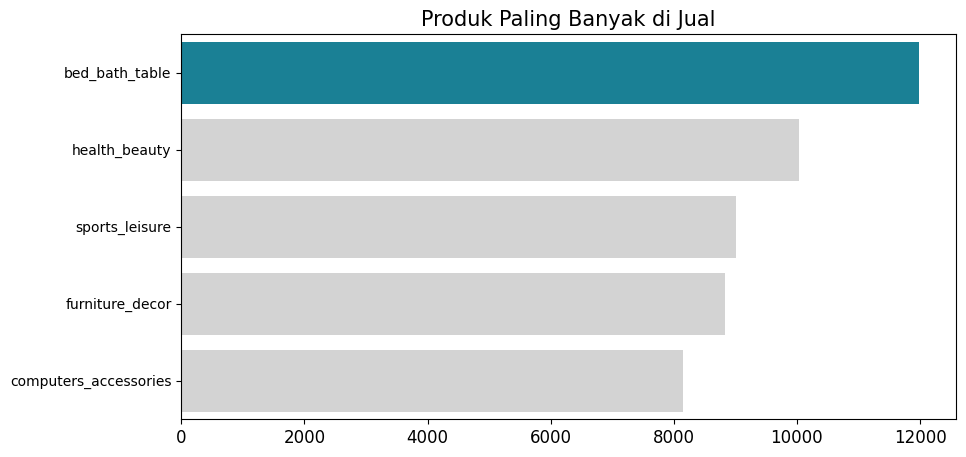

In [1076]:
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))

sn.barplot(
    y="product_category_name_english",
    x="jumlah",
    data=produkLaris.sort_values(by="jumlah", ascending=False).head(5),
    palette=colors
)
plt.title("Produk Paling Banyak di Jual", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Dari grafik diatas produk paling banyak terjual adalah bed_bath_table.

### Pertanyaan 2: Produk apa yang paling sedikit terjual?

In [1077]:
produkLaris = produkLaris.sort_values(by="jumlah", ascending=True)
produkLaris = produkLaris.head(10)

produkLaris.head()

,product_category_name_english,jumlah
61,security_and_services,2
29,fashion_childrens_clothes,8
11,cds_dvds_musicals,14
52,la_cuisine,16
3,arts_and_craftmanship,24


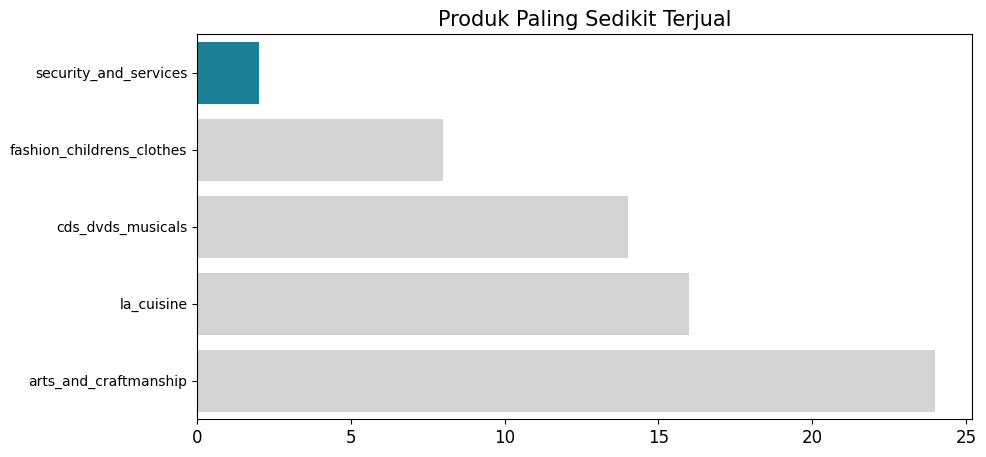

In [1078]:
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))

sn.barplot(
    y="product_category_name_english",
    x="jumlah",
    data=produkLaris.sort_values(by="jumlah", ascending=True).head(5),
    palette=colors
)
plt.title("Produk Paling Sedikit Terjual", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Dari grafik diatas produk paling sedikit terjual adalah auto.

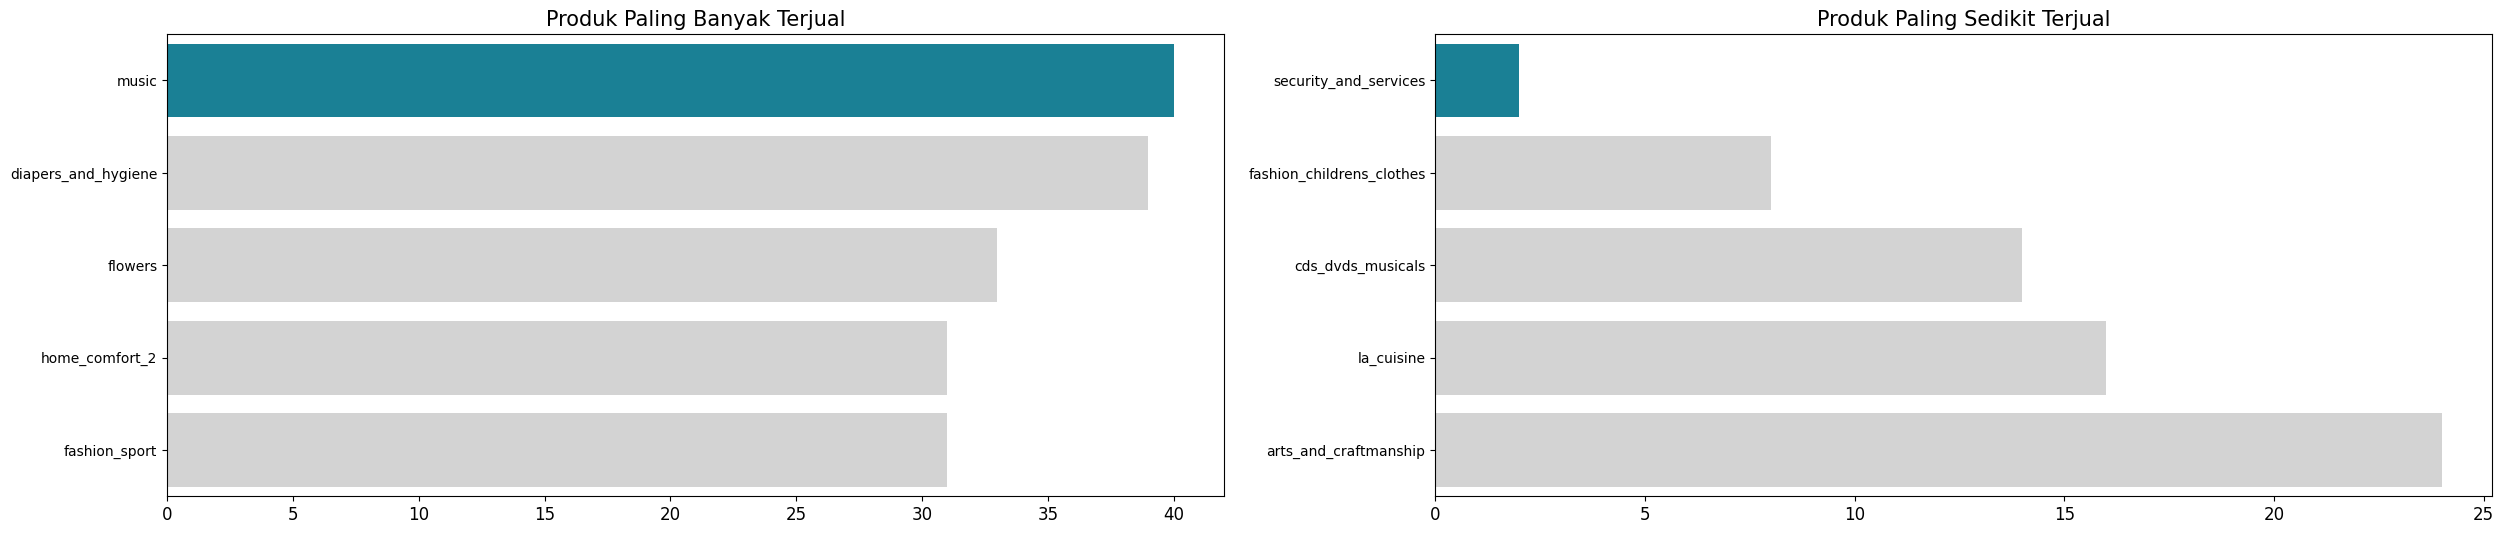

In [1079]:
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

# Diagram batang untuk produk paling banyak terjual
sn.barplot(
    y="product_category_name_english",
    x="jumlah",
    data=produkLaris.sort_values(by="jumlah", ascending=False).head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_title("Produk Paling Banyak Terjual", loc="center", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=12)

# Diagram batang untuk produk paling sedikit terjual
sn.barplot(
    y="product_category_name_english",
    x="jumlah",
    data=produkLaris.sort_values(by="jumlah", ascending=True).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_title("Produk Paling Sedikit Terjual", loc="center", fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=12)

# Menampilkan plot
plt.show()

perbandingan grafik produk banyak banyak terjual dan paling sedikit

### Pertanyaan 3: Dimana letak customer paling banyak?

In [1080]:
banyakCust = allData_df.groupby(["customer_city","customer_state"])["customer_id"].nunique().reset_index()
banyakCust = banyakCust.rename(columns={"customer_id": "jumlah"})
banyakCust.groupby(by=["customer_city","customer_state"]).agg({
    "jumlah": "sum" ,
}).sort_values(by=("jumlah"), ascending=False)

,,jumlah
customer_city,customer_state,
sao paulo,SP,15402
rio de janeiro,RJ,6834
belo horizonte,MG,2750
brasilia,DF,2116
curitiba,PR,1510
...,...,...
estrela d'oeste,SP,1
maranhaozinho,MA,1
estrela do sul,MG,1


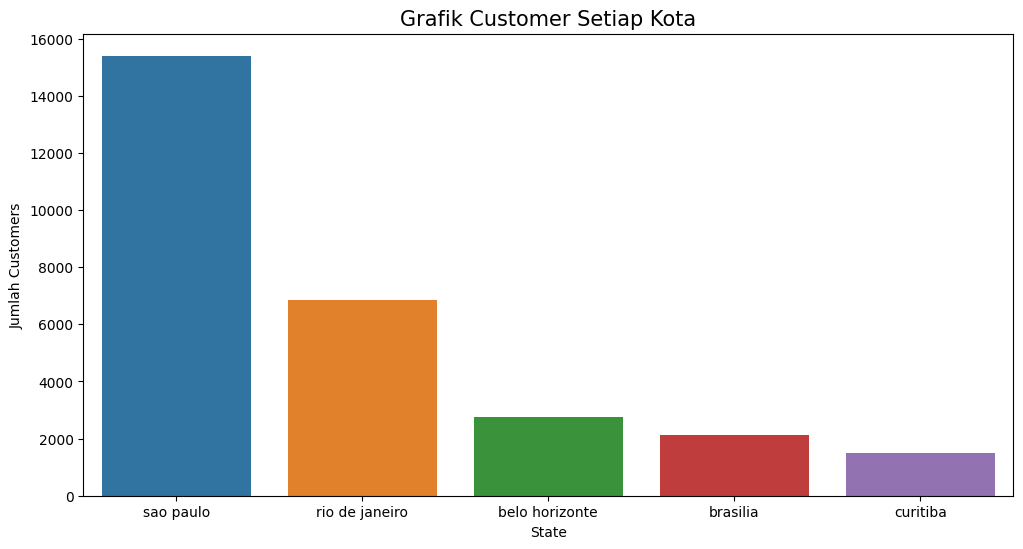

In [1081]:
plt.figure(figsize=(12, 6))
banyakCust = banyakCust.sort_values(by='jumlah', ascending=False).head(5)

sn.barplot(x='customer_city',
            y='jumlah',
            data=banyakCust,
            )

plt.title("Grafik Customer Setiap Kota", fontsize=15)
plt.xlabel("State")
plt.ylabel("Jumlah Customers")
plt.xticks(fontsize=10)
plt.show()

Diketahui bahwa customer terbanyak berada di kota sao paulo

In [1082]:
banyakState = allData_df.groupby(["customer_state"])["customer_id"].nunique().reset_index()
banyakState = banyakState.rename(columns={"customer_id": "jumlah"})
banyakState.groupby(by=["customer_state"]).agg({
    "jumlah": "sum" ,
}).sort_values(by=("jumlah"), ascending=False).head(5)

,jumlah
customer_state,
SP,41375
RJ,12762
MG,11544
RS,5432
PR,4998


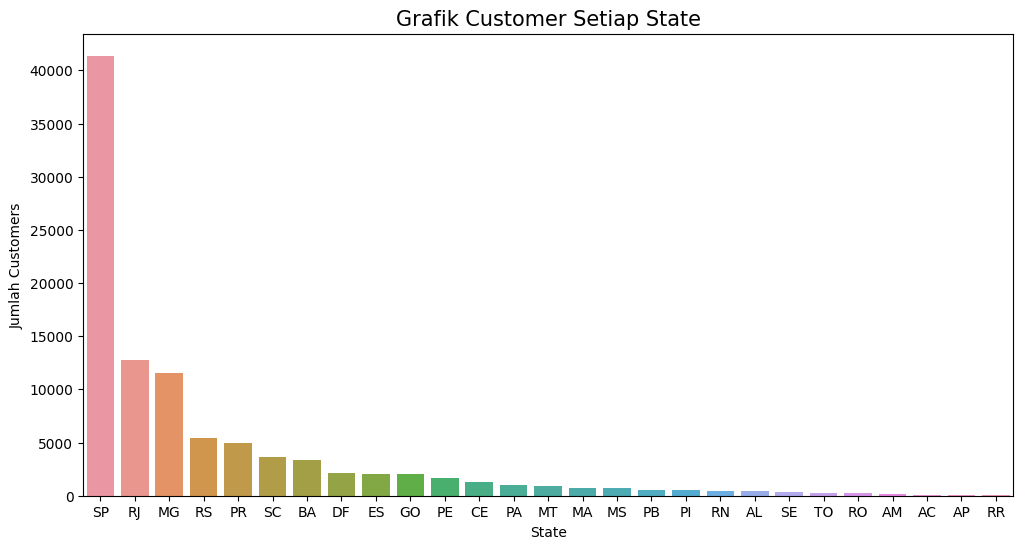

In [1083]:
plt.figure(figsize=(12, 6))
banyakState = banyakState.sort_values(by='jumlah', ascending=False)

sn.barplot(x='customer_state',
            y='jumlah',
            data=banyakState,
            )

plt.title("Grafik Customer Setiap State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Jumlah Customers")
plt.xticks(fontsize=10)
plt.show()

Diketahui bahwa customer terbanyak berada di state **SP** dan terendah adalah **RR**

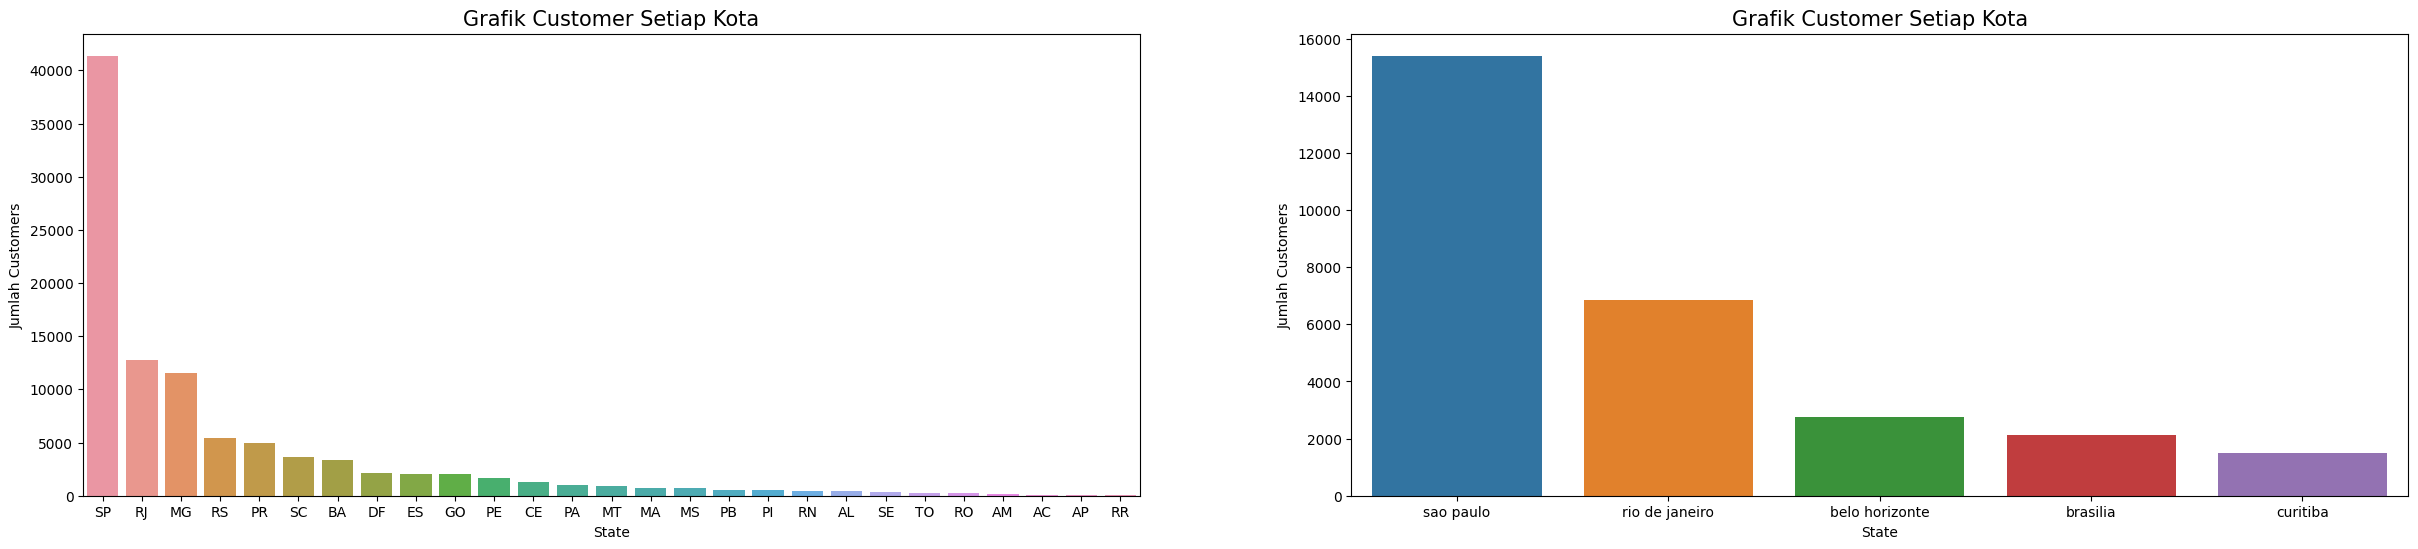

In [1084]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))


sn.barplot(x='customer_state',
            y='jumlah',
            data=banyakState,
            ax=ax[0]
)


ax[0].set_title("Grafik Customer Setiap Kota", fontsize=15)
ax[0].set_ylabel("Jumlah Customers")
ax[0].set_xlabel("State")
ax[0].tick_params(axis='x', labelsize=10)

sn.barplot(x='customer_city',
            y='jumlah',
            data=banyakCust,
            ax=ax[1]
)


ax[1].set_title("Grafik Customer Setiap Kota", fontsize=15)
ax[1].set_ylabel("Jumlah Customers")
ax[1].set_xlabel("State")
ax[1].tick_params(axis='x', labelsize=10)

plt.show()

In [1085]:
geo_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [1086]:
print('\n  jumlah missing values geo_df \n', geo_df.isna().sum())


  jumlah missing values geo_df 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [1087]:
geoMedian = geo_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geoMedian.head(5)

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,1001,sao paulo,SP,-23.550498,-46.634027
1,1001,são paulo,SP,-23.549951,-46.634027
2,1002,sao paulo,SP,-23.548551,-46.635072
3,1002,são paulo,SP,-23.544641,-46.633180
4,1003,sao paulo,SP,-23.548976,-46.635318


In [1088]:
geoCust = customers_df.merge(geoMedian,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')
geoCust.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822


In [1089]:
data_map = geoCust.dropna()
rome_lat, rome_lng = -23.5505, -46.6333
my_map = folium.Map(location=[rome_lat, rome_lng], zoom_start=5)
my_map.add_child(plugins.FastMarkerCluster(data_map[['geolocation_lat', 'geolocation_lng']].values.tolist()))
my_map

Output hidden; open in https://colab.research.google.com to view.

In [1090]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='green')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

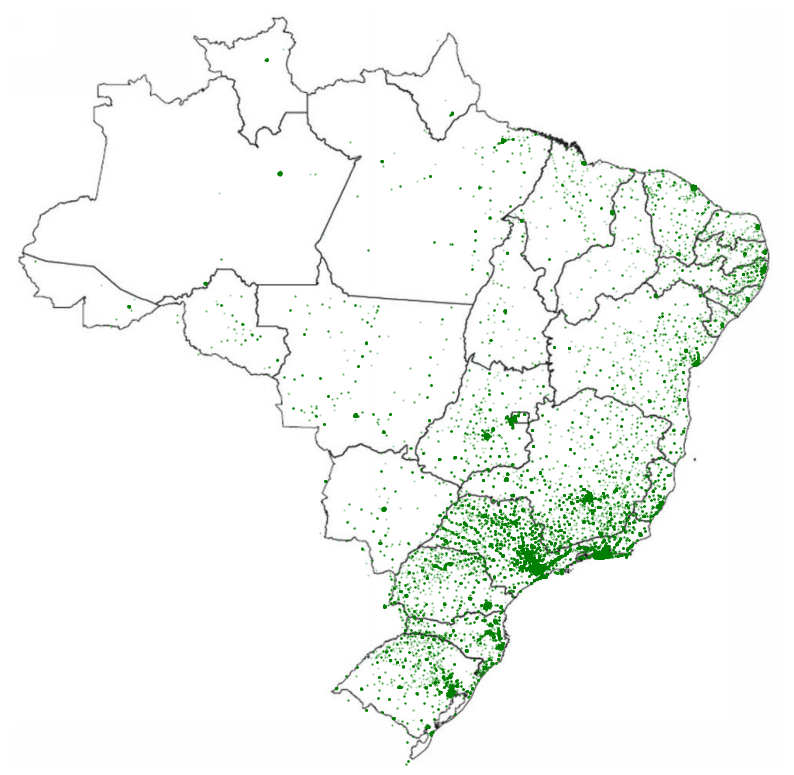

In [1091]:
plot_brazil_map(data_map.drop_duplicates(subset='customer_unique_id'))

Dari kedua peta tersebut diketahui bahwa pelanggan terbanyak berasal dari bagian timur hingga selatan.

### Pertanyaan 4: Jenis Pembayaran Favorit customer

In [1092]:
bayar = allData_df.groupby(["payment_type"])["order_id"].nunique().reset_index()
bayar = bayar.rename(columns={"order_id": "jumlah"})
bayar.groupby(by=["payment_type"]).agg({
    "jumlah": "sum" ,
}).sort_values(by=("jumlah"), ascending=False)

,jumlah
payment_type,
credit_card,75991
boleto,19614
voucher,3766
debit_card,1521


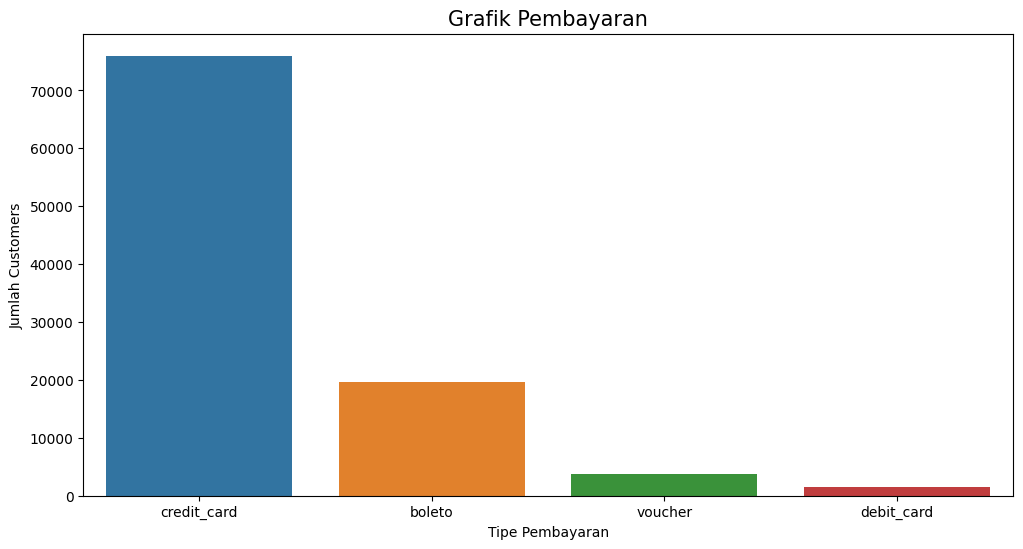

In [1093]:
plt.figure(figsize=(12, 6))
bayar = bayar.sort_values(by='jumlah', ascending=False)

sn.barplot(x='payment_type',
            y='jumlah',
            data=bayar,
            )

plt.title("Grafik Pembayaran", fontsize=15)
plt.xlabel("Tipe Pembayaran")
plt.ylabel("Jumlah Customers")
plt.xticks(fontsize=10)
plt.show()

Pembayaran Favorit Customer adalah credit_card dan paling sedikit di pakai adalah Debit_card

In [1094]:
bayarSt = allData_df.groupby(["payment_type","customer_state"])["order_id"].nunique().reset_index()
bayarSt = bayarSt.rename(columns={"order_id": "jumlah"})
bayarSt.groupby(by=["payment_type","customer_state"]).agg({
    "jumlah": "sum" ,
}).sort_values(by=("jumlah"), ascending=False)

jumlah
payment_type customer_state        
credit_card  SP               31833
             RJ               10188
             MG                8965
boleto       SP                8123
credit_card  RS                3948
...                             ...
voucher      AC                   4
debit_card   RO                   3
voucher      AP                   3
debit_card   AM                   2
             AC                   2

[105 rows x 1 columns]

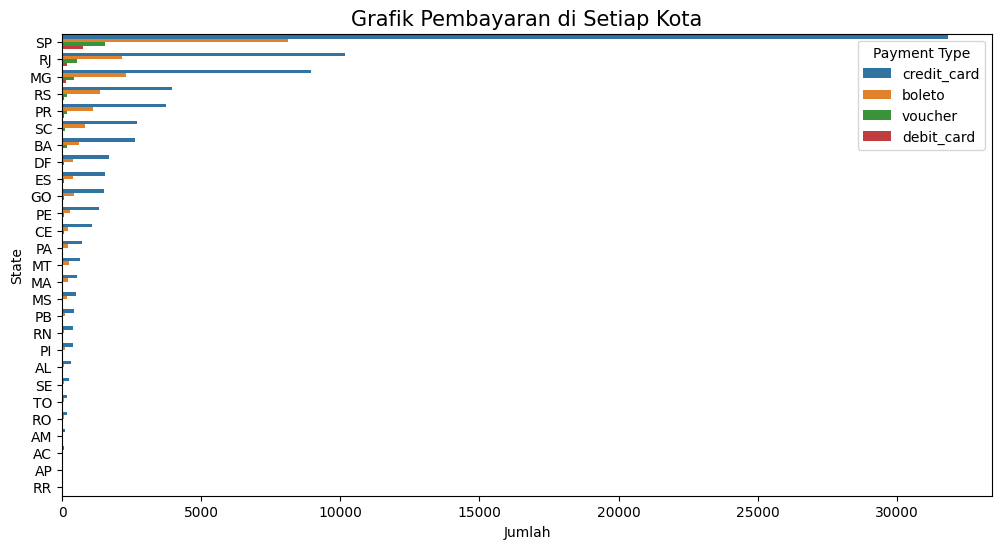

In [1095]:
plt.figure(figsize=(12, 6))
bayarSt = bayarSt.sort_values(by='jumlah', ascending=False)

sn.barplot(x='jumlah',
            y='customer_state',
            hue='payment_type',
            data=bayarSt)

plt.title("Grafik Pembayaran di Setiap Kota", fontsize=15)
plt.ylabel("State")
plt.xlabel("Jumlah")
plt.xticks(fontsize=10)
plt.legend(title="Payment Type")

plt.show()

Pembayaran credit_card merupakan pembayaran favorit di hampir semua state dan State SP Merupakan State yang paling banyak melakukan transaksi dengan Credit Card

### Pertanyaan 5: Berapa tingkat pendapatan selama beberapa bulan terakhir?

Tahun Terbaru 2018

In [1171]:
bulan = allData_df.resample(rule='M', on='order_approved_at').agg({
            "price": "sum"
}).reset_index()

bulan.rename(columns={
            "price": "Pengeluaran"
        }, inplace=True)

bulan = bulan[(bulan['order_approved_at'] >= '2018-01-01') & (bulan['order_approved_at'] <= '2018-12-31')]

# Konversi ke nama bulan Tahun
bulan['order_approved_at'] = bulan['order_approved_at'].dt.strftime('%B %Y')

bulan

,order_approved_at,Pengeluaran
16,January 2018,986284.61
17,February 2018,882417.57
18,March 2018,1039716.71
19,April 2018,1010481.51
20,May 2018,1056093.87
21,June 2018,914410.56
22,July 2018,908431.56
23,August 2018,909806.29
24,September 2018,145.00


In [1129]:
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

bulan['month_cat'] = pd.Categorical(bulan['order_approved_at'], categories=custom_order, ordered=True)

bulan = bulan.sort_values(by='month_cat')

bulan = bulan.drop(columns=['month_cat'])

bulan

,order_approved_at,Pengeluaran
16,January 2018,986284.61
17,February 2018,882417.57
18,March 2018,1039716.71
19,April 2018,1010481.51
20,May 2018,1056093.87
21,June 2018,914410.56
22,July 2018,908431.56
23,August 2018,909806.29
24,September 2018,145.00


In [1131]:
print("Seluruh Pengeluaran Customer 2018 : ",bulan['Pengeluaran'].sum())
print("Rata - Rata Pengeluaran Customer 2018 : ",bulan['Pengeluaran'].mean())

Seluruh Pengeluaran Customer 2018 :  7707787.68
Rata - Rata Pengeluaran Customer 2018 :  856420.8533333333


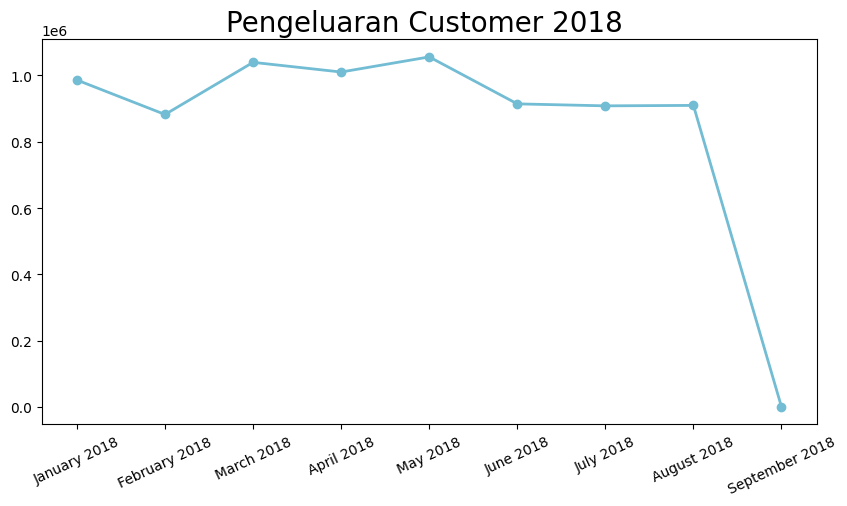

In [1133]:
plt.figure(figsize=(10, 5))
plt.plot(
    bulan["order_approved_at"],
    bulan["Pengeluaran"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Pengeluaran Customer 2018 ", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

Grafik Menujukan Pengeluran yang fluktuatif kecuali di september di karenakan september datanya tidak lengkap

In [1136]:
oderan = allData_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
}).reset_index()

oderan.rename(columns={
            "order_id": "jumlah order"
        }, inplace=True)
oderan = oderan[(oderan['order_approved_at'] >= '2018-01-01') & (oderan['order_approved_at'] <= '2018-12-31')]

# Konversi ke nama oderan
oderan['order_approved_at'] = oderan['order_approved_at'].dt.strftime('%B %Y')

oderan

,order_approved_at,jumlah order
16,January 2018,8491
17,February 2018,8009
18,March 2018,8686
19,April 2018,8069
20,May 2018,8478
21,June 2018,7384
22,July 2018,7222
23,August 2018,7658
24,September 2018,1


In [1138]:
print("Seluruh Oderan Customer 2018 : ",oderan['jumlah order'].sum())
print("Rata - Rata Oderan Customer 2018 : ",oderan['jumlah order'].mean())

Seluruh Oderan Customer 2018 :  63998
Rata - Rata Oderan Customer 2018 :  7110.888888888889


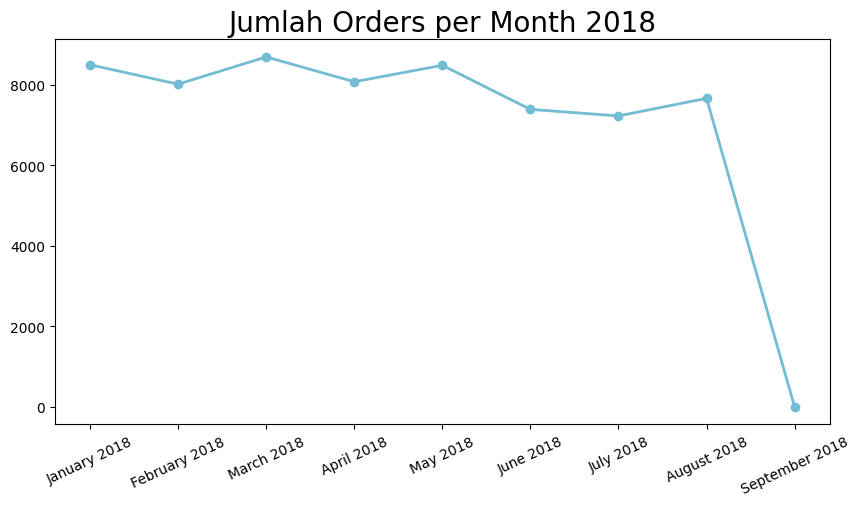

In [1140]:
plt.figure(figsize=(10, 5))
plt.plot(
    oderan["order_approved_at"],
    oderan["jumlah order"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Jumlah Orders per Month 2018", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

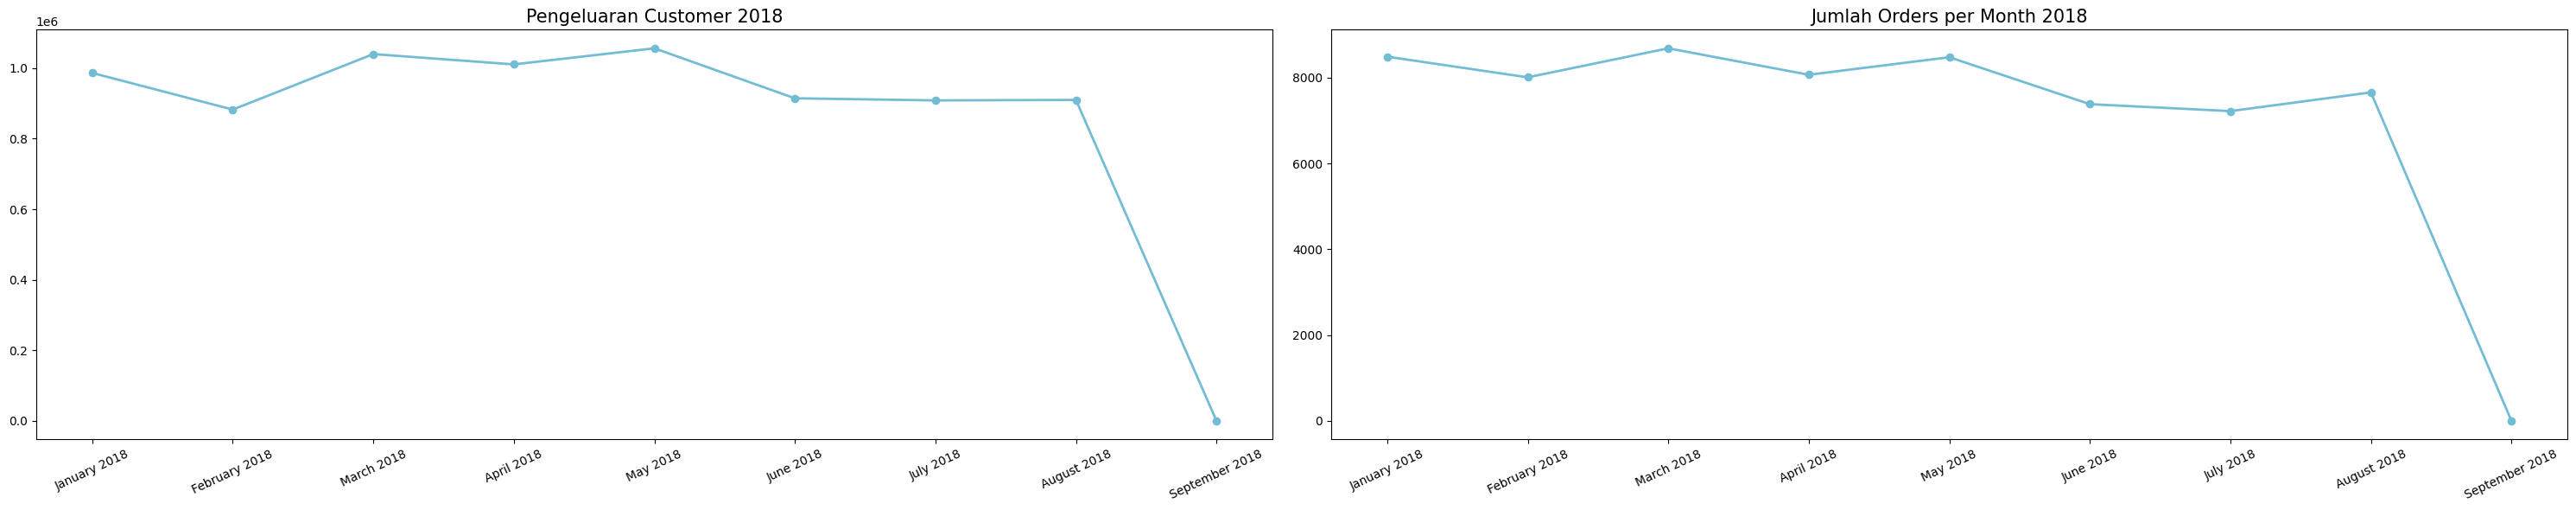

In [1143]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

# Subplot pertama untuk Pengeluaran Customer
ax[0].plot(
    bulan["order_approved_at"],
    bulan["Pengeluaran"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
ax[0].set_title("Pengeluaran Customer 2018", fontsize=15)
ax[0].set_xticks(bulan["order_approved_at"])
ax[0].tick_params(axis='x', rotation=25)
ax[0].tick_params(axis='y', labelsize=10)

# Subplot kedua untuk Jumlah Orders
ax[1].plot(
    oderan["order_approved_at"],
    oderan["jumlah order"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
ax[1].set_title("Jumlah Orders per Month 2018", fontsize=15)
ax[1].set_xticks(oderan["order_approved_at"])
ax[1].tick_params(axis='x', rotation=25)
ax[1].tick_params(axis='y', labelsize=10)

# Adjust layout untuk mencegah tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

### Pertanyaan 6: Bagaimana tingkat kepuasan pelanggan ?

In [1152]:
review=allData_df['review_score'].value_counts().sort_values(ascending=False)
review

5.0    66264
4.0    22286
1.0    14857
3.0     9840
2.0     4085
Name: review_score, dtype: int64

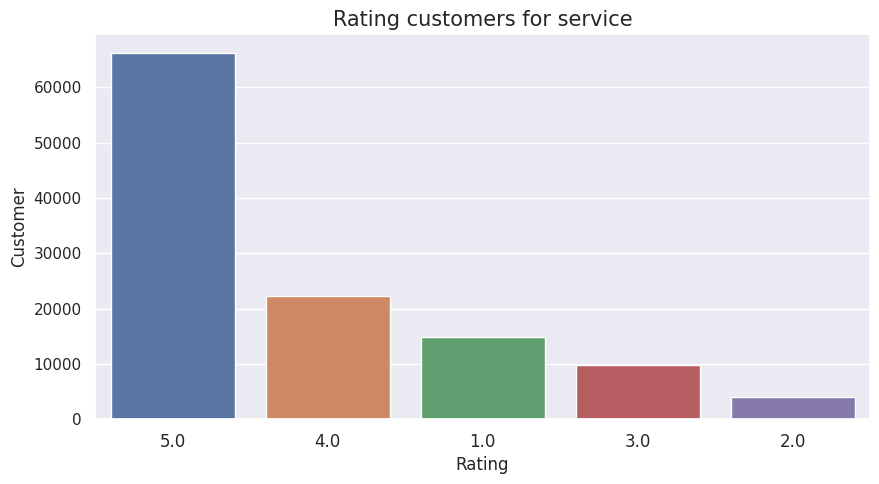

In [1170]:
plt.figure(figsize=(10, 5))
sn.barplot(x=review.index,
            y=review.values,
            order=review.index,
            )

plt.title("Rating customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
plt.show()

## Conclusion

- **Produk apa yang paling banyak terjual?**

Berdasarkan data yang divisualisasikan pembelian customer terbesar ada pada produk beth_bad_table

- **Produk apa yang paling sedikit terjual?**

pembelian produk terkecil pada security_and_service

- **Dimana letak customer paling banyak?**

Sesuai Grafik yang telah dibuat letak Customer paling banyak menurut kotanya terletak di sao paulo dan menurut Statenya Juga sama yaitu SP hasil dari peta juga menunjukan bahwa customer paling banyak terletak pada Timur hingga selatan  

- **Jenis Pembayaran Favorit customer?**

Dari Grafik Terlihat bahwa Pembayaran favorit customer adalah credit card dan yang paling sedikit adalah debit card

- **Berapa pengeluaran customer selama beberapa bulan terakhir?**

Dari Visualisasi data pengeluran customer pada tahun 2018 terbilang fluktuatif yang dimana pada bulan januari ke februari mengalami penurunan namun maret hingga may mengalami kenaikan namun pada bulan june kembali mengalami penurunan, kemudian june july terjadi kenaikan namun pada september terjadi anomali penurunan yang sangat drastis di karenakan hanya terdapat 1 orderan

- **Bagaimana tingkat kepuasan pelanggan ?**

Tingkat kepuasan pelanggan sangtlah memuaskan dari visualisasi customer cukup banyak memberikan rating 5 dan rating 4 pada urutan ke 2